In [7]:
import os, datetime

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [45]:
df = pd.read_csv("C:/Users/Floor/Downloads/Datasets/Real Estate/Real estate.csv", index_col = 0)

In [46]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.shape

(414, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Data Visualization

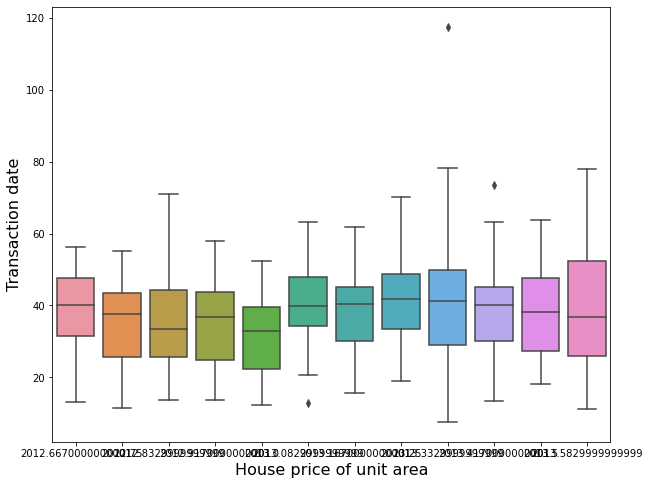

In [33]:
plt.figure(figsize=(10, 8))

sns.boxplot("X1 transaction date", "Y house price of unit area",data = df)

plt.xlabel("House price of unit area", fontsize = 16)
plt.ylabel("Transaction date", fontsize = 16)

plt.show()

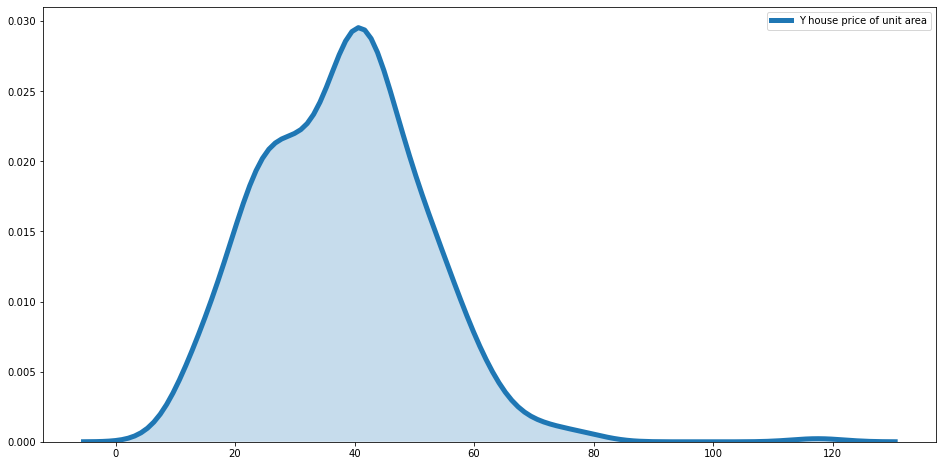

In [36]:
x = df["Y house price of unit area"]
x =x[np.logical_not(np.isnan(x))]

plt.figure(figsize=(16, 8))
sns.kdeplot(x ,shade = True, linewidth = 5)

plt.show()

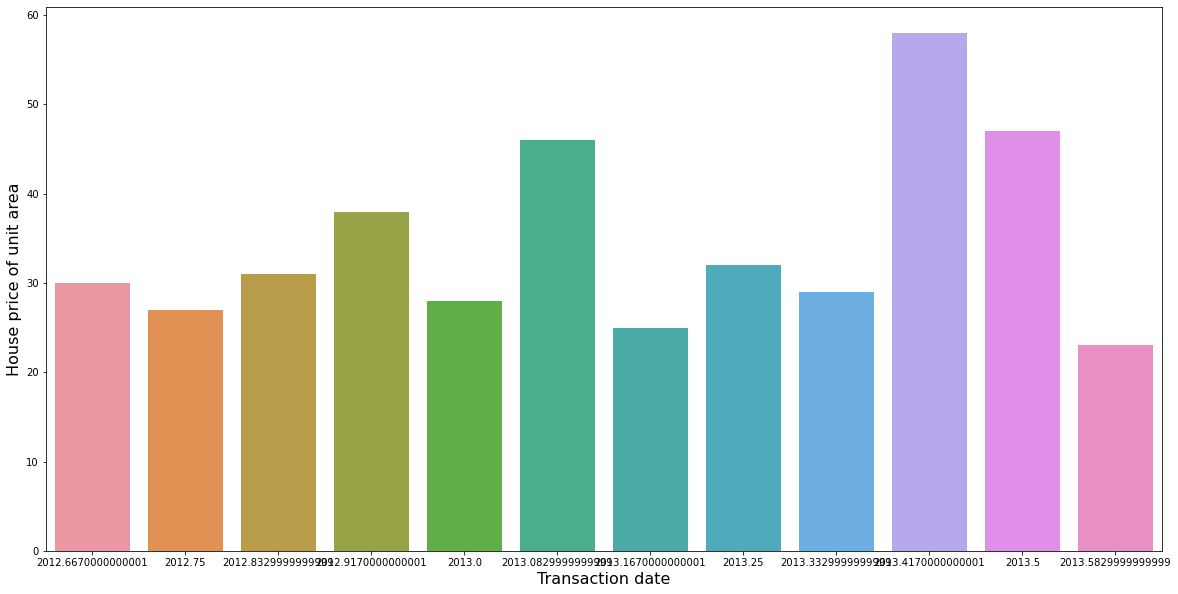

In [16]:
plt.figure(figsize=(20, 10))

sns.countplot(x="X1 transaction date", data=df)


plt.xlabel("Transaction date", fontsize = 16)
plt.ylabel("House price of unit area", fontsize = 16)

plt.show()

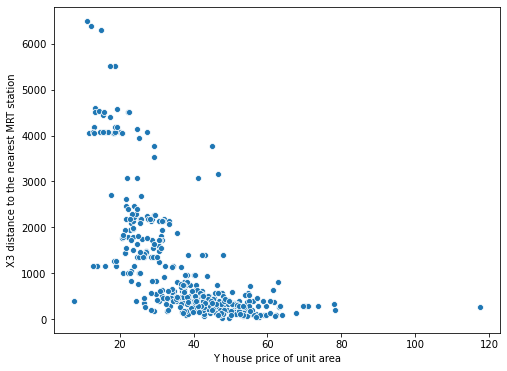

In [25]:
plt.figure(figsize=(8, 6))

sns.scatterplot('Y house price of unit area', 'X3 distance to the nearest MRT station', data = df)

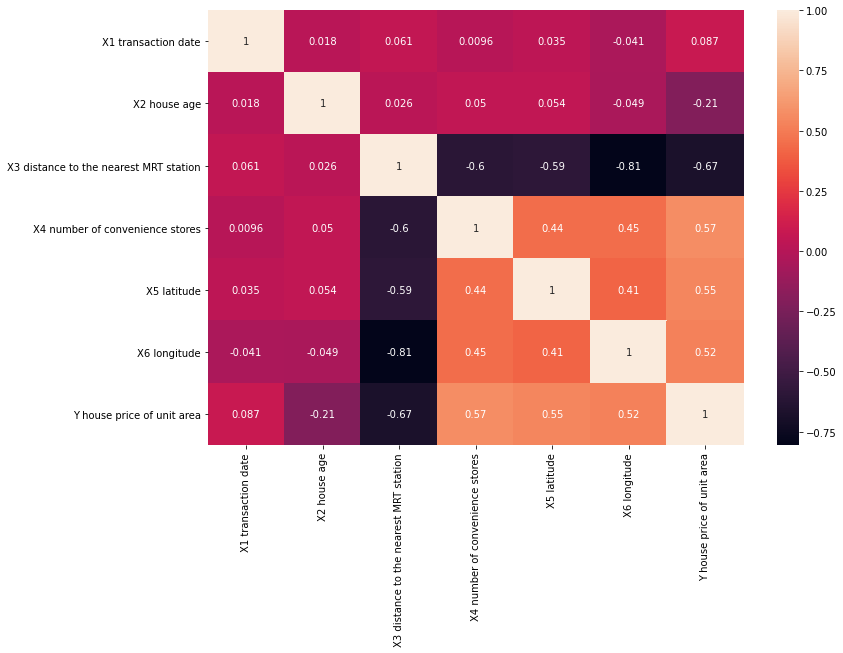

In [59]:
data_cor = df[["X1 transaction date",
               "X2 house age", 
               "X3 distance to the nearest MRT station", 
               "X4 number of convenience stores", 
               "X5 latitude", 
               "X6 longitude", 
               "Y house price of unit area"]].corr()

data_cor


fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_cor, annot=True)

plt.show()

In [70]:
train_data = df.drop("Y house price of unit area", axis=1)
target = df["Y house price of unit area"]

train_data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [72]:
target.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [74]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627


In [76]:
standardScaler = StandardScaler()

train_data = pd.DataFrame(standardScaler.fit_transform(train_data),
                          columns = train_data.columns,
                          index = train_data.index)

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,4.134599e-13,1.00121,-1.711384,-0.823683,0.064017,0.951718,1.541151
X2 house age,414.0,-6.704245e-17,1.00121,-1.556639,-0.763492,-0.141717,0.917277,2.292652
X3 distance to the nearest MRT station,414.0,-1.161175e-16,1.00121,-0.841279,-0.630312,-0.469349,0.293827,4.287008
X4 number of convenience stores,414.0,-1.072679e-18,1.00121,-1.391638,-1.051734,-0.032020,0.647789,2.007407
X5 latitude,414.0,9.345396e-14,1.00121,-2.981805,-0.486485,0.166994,0.679693,3.675611
X6 longitude,414.0,-1.594378e-12,1.00121,-3.903223,-0.344198,0.343730,0.648715,2.146891


### Splitting train data - test data

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [79]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((331, 6), (83, 6)), ((331,), (83,)))

### Creating model

In [144]:
def real_estate_model():
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(16, 
                                    input_shape = (x_train.shape[1],), 
                                    activation = 'sigmoid'))

    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss = 'mse', 
                  metrics = ['mae', 'mse'], 
                  optimizer = optimizer)

    return model

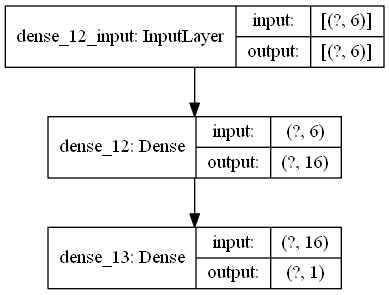

In [145]:
model = real_estate_model()

tf.keras.utils.plot_model(model, show_shapes = True)

In [146]:
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
 
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [147]:
training_history = model.fit(x_train, 
                             y_train, 
                             validation_split = 0.2, 
                             epochs = 1500,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

Epoch 1/1500
3/3 [==============================] - 0s 133ms/step - loss: 1764.9377 - mae: 39.4142 - mse: 1764.9377 - val_loss: 1510.2239 - val_mae: 37.4398 - val_mse: 1510.2239
Epoch 2/1500
3/3 [==============================] - 0s 7ms/step - loss: 1738.6738 - mae: 39.1003 - mse: 1738.6738 - val_loss: 1485.4585 - val_mae: 37.1239 - val_mse: 1485.4585
Epoch 3/1500
3/3 [==============================] - 0s 8ms/step - loss: 1711.9530 - mae: 38.7826 - mse: 1711.9530 - val_loss: 1461.0831 - val_mae: 36.8101 - val_mse: 1461.0831
Epoch 4/1500
3/3 [==============================] - 0s 7ms/step - loss: 1686.5039 - mae: 38.4708 - mse: 1686.5039 - val_loss: 1436.9098 - val_mae: 36.4966 - val_mse: 1436.9098
Epoch 5/1500
3/3 [==============================] - 0s 7ms/step - loss: 1660.4418 - mae: 38.1553 - mse: 1660.4418 - val_loss: 1413.0295 - val_mae: 36.1841 - val_mse: 1413.0295
Epoch 6/1500
3/3 [==============================] - 0s 7ms/step - loss: 1635.4753 - mae: 37.8467 - mse: 1635.4753 - va

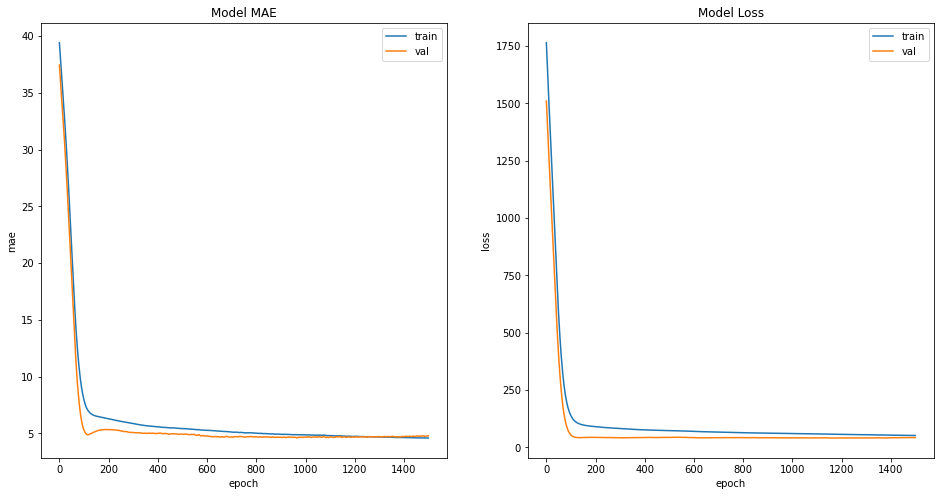

In [148]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [149]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [150]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 669us/step - loss: 36.6794 - mae: 4.7453 - mse: 36.6794


[36.679359436035156, 4.7453083992004395, 36.679359436035156]

In [151]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.7583482834240368

In [152]:
aa = pd.DataFrame(y_pred, columns = ["Predictions"])
aa

,Predictions
0,27.149870
1,52.839268
2,23.500542
3,17.575911
4,51.103489
...,...
78,47.469177
79,48.316608
80,40.456566
81,45.824932


In [153]:
results = pd.DataFrame({"y_test": y_test.values.flatten(),
                       'y_pred': y_pred.flatten()}, index = range(len(y_pred)))
results

,y_test,y_pred
0,27.3,27.149870
1,54.4,52.839268
2,22.0,23.500542
3,11.6,17.575911
4,45.4,51.103489
...,...,...
78,33.1,47.469177
79,59.6,48.316608
80,40.8,40.456566
81,52.2,45.824932
